In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [6]:
data = sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
data.shape

(150, 5)

In [10]:
len(data)

150

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 1.0


### Model predict

In [37]:
clf.predict([[1,2,1,3]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

### Features_Importances weight analyse 

In [40]:
feature_list = list(X.columns)

In [42]:
feature_list

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [44]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
feature_imp

petal_width     0.463454
petal_length    0.401473
sepal_length    0.102294
sepal_width     0.032779
dtype: float64

In [46]:
feature_imp.index

Index(['petal_width', 'petal_length', 'sepal_length', 'sepal_width'], dtype='object')

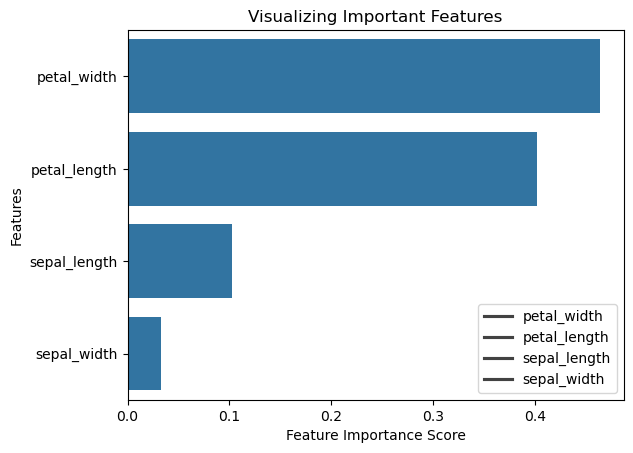

In [48]:
sns.barplot(x=feature_imp,y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend(feature_imp.index)
plt.show()

## reduce the feature X

In [53]:
X = data[['sepal_length',  'petal_length', 'petal_width']] #reduce 'sepal_width',
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 1.0


# 2: Random forest for regression _ series data

In [64]:
dataset = pd.read_csv('petrol_consumption.csv')

In [66]:
dataset

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [70]:
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,4]

In [72]:
X

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [74]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
X_train

array([[ 0.35656616,  0.29221232,  0.77194402, -0.70911665],
       [-0.14825925,  1.00226838, -0.9251177 , -0.70911665],
       [ 0.35656616,  1.75596854,  1.66899351, -2.07659991],
       [-0.65308466,  0.12099313, -0.50153372,  1.79793598],
       [-0.14825925, -1.53748296, -0.44265718, -0.39354359],
       [-0.65308466, -0.11065637,  0.22760861, -0.42860727],
       [-0.65308466, -0.93150131, -0.27802093, -0.51626645],
       [ 1.36621697,  0.34089229, -0.49144838,  0.02722048],
       [-0.65308466,  0.0756704 ,  1.25249651,  0.29019803],
       [-0.65308466,  0.40132259,  0.75286366, -0.30588441],
       [-0.65308466, -0.11233499,  0.75313624,  0.04475232],
       [ 1.36621697, -1.1278998 , -0.29846417, -1.34026277],
       [ 0.35656616, -2.0309971 ,  0.21234432,  0.14994334],
       [-0.65308466,  0.03874077, -0.45301509,  0.93887599],
       [ 1.36621697, -1.17825838, -1.02733392, -0.779244  ],
       [-0.65308466, -1.57776983,  0.23142468, -0.98962604],
       [-0.65308466, -1.

In [88]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

# Evaluating the Alforithm

In [91]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 58.218999999999994
Mean Squared Error: 8244.867849999999
Root Mean Squared error: 90.80125467194821


In [93]:
rmse=nestimators=[]
for n in [20,30,50,80,100,200,300,400,500,600,700,800]:
    regressor = RandomForestRegressor(n_estimators=n, random_state=0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    print('----------------')
    print('n_estimators={}'.format(n))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    nestimators=np.append(nestimators,n)
    

----------------
n_estimators=20
Mean Absolute Error: 52.98499999999999
Mean Squared Error: 7162.272249999999
Root Mean Squared error: 84.63020885003179
----------------
n_estimators=30
Mean Absolute Error: 57.999999999999986
Mean Squared Error: 8484.476666666666
Root Mean Squared error: 92.11121900543205
----------------
n_estimators=50
Mean Absolute Error: 60.18800000000001
Mean Squared Error: 8465.476480000005
Root Mean Squared error: 92.00802399791012
----------------
n_estimators=80
Mean Absolute Error: 58.31875
Mean Squared Error: 8085.626109375
Root Mean Squared error: 89.92010959387783
----------------
n_estimators=100
Mean Absolute Error: 58.218999999999994
Mean Squared Error: 8244.867849999999
Root Mean Squared error: 90.80125467194821
----------------
n_estimators=200
Mean Absolute Error: 55.61550000000001
Mean Squared Error: 7785.867737500002
Root Mean Squared error: 88.2375642087881
----------------
n_estimators=300
Mean Absolute Error: 57.153000000000006
Mean Squared Erro

In [95]:
rmse

array([84.63020885, 92.11121901, 92.008024  , 89.92010959, 90.80125467,
       88.23756421, 88.73373305, 88.479132  , 88.22139552, 89.28762839,
       89.49935806, 89.06525574])

In [99]:
nestimators

array([ 20.,  30.,  50.,  80., 100., 200., 300., 400., 500., 600., 700.,
       800.])

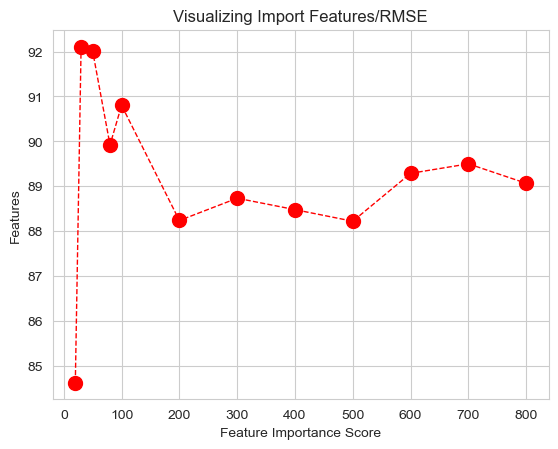

In [103]:
sns.set_style('whitegrid')
plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Import Features/RMSE')
plt.show()